## Delroy Nichols
## Python 765

# Introduction

Urbanization's impact on fertility rates is a critical concern with broad implications. Declining fertility in urban areas can lead to population imbalances and economic challenges. Understanding the factors that influence family size decisions in cities is crucial for developing policies and strategies to support sustainable population growth and address the potential consequences of below-replacement fertility.

This project delves into the intriguing question of whether city size influences family size, particularly the number of children in a household. Leveraging data from the General Social Survey (GSS) dataset, the project employs a variety of visualization techniques to analyze the relationship between these two variables.
    
Throughout this project you will see instances of data preparation, including handling missing values and creating categorical variables for city size and income level. Univariate and bivariate analyses were essential for attacking the issue, revealing patterns and trends in the distributions and relationships between the variables. 

The project also explores the potential impact of additional factors, such as income and age, on family size. The findings suggest that city size may indeed play a role in family size decisions, with city dwellers tending to have fewer children compared to their small-town counterparts.

## GSS Dataset
    The General Social Survey (GSS) is a long-running sociological survey that collects data on a wide range of social and demographic topics from adults in the United States. The GSS is a cross-sectional survey, which means that it collects data from a different sample of respondents each time it is conducted. This makes it possible to track changes in attitudes and behaviors over time. The GSS is also a representative survey, which means that the sample of respondents is designed to be representative of the adult population of the United Sates. This makes it possible to generalize findings of the survey to the broader population.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load the dataset

In [5]:
path = 'https://raw.githubusercontent.com/UC-MACSS/persp-analysis/master/assignments/exploratory-data-analysis/data/gss2012.csv'
df = pd.read_csv(path, header=0)  

## Select relevant columns

In [6]:
data = df[['childs', 'sex', 'income06', 'size', 'id', 'age']]

### There are 1974 observations and 221 variables in the total dataset. 

# Research Question and Design

## Do full time employees struggle to have children when comparing large city dwellers to those living in smaller towns?

## Hypothesis: City dwellers are less likely to have children than those living in smaller towns, and this effect is moderated by income level.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1974 entries, 0 to 1973
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   childs    1971 non-null   float64
 1   sex       1974 non-null   object 
 2   income06  1758 non-null   object 
 3   size      1974 non-null   int64  
 4   id        1974 non-null   float64
 5   age       1969 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 92.7+ KB


In [9]:
data.head()

,childs,sex,income06,size,id,age
0,0.0,Male,$150000 OR OVER,14,1.0,22.0
1,0.0,Male,$150000 OR OVER,14,2.0,21.0
2,2.0,Male,$110000 TO $129999,14,3.0,42.0
3,2.0,Female,$130000 TO $149999,14,4.0,49.0
4,3.0,Female,$50000 TO 59999,24,5.0,70.0


### Step 2.) I'm missing 216 values in the income column, not a large percentage so I'm going to remove them from the overall dataset.  The 'size' variable is an integer that I will change to a categorical variable with an ordinal order so that we can seperate the participants by where they live.

In [15]:
data.groupby('income06').size()

income06
$1 000 TO 2 999        25
$10000 TO 12499        77
$110000 TO $129999     68
$12500 TO 14999        63
$130000 TO $149999     45
$15000 TO 17499        58
$150000 OR OVER       144
$17500 TO 19999        48
$20000 TO 22499        66
$22500 TO 24999        60
$25000 TO 29999        93
$3 000 TO 3 999        18
$30000 TO 34999        89
$35000 TO 39999       101
$4 000 TO 4 999        10
$40000 TO 49999       151
$5 000 TO 5 999         8
$50000 TO 59999       118
$6 000 TO 6 999        22
$60000 TO 74999       153
$7 000 TO 7 999        24
$75000 TO $89999      151
$8 000 TO 9 999        38
$90000 TO $109999     104
UNDER $1 000           24
dtype: int64

In [16]:
df.shape

(1974, 221)

In [43]:
df_copy = pd.read_csv(path, header=0) 
df_drop_select = df_copy.dropna(subset=['income06'])
df_drop_select.shape

(1758, 221)

### Step 3.) I decided to transform the income06 variables because it had too many missing vsalues and that would impact my dataset, the other 3 variables were in good shape.

In [44]:
df_drop_emptyrow = df_copy.dropna(how='all')
df_drop_emptycol = df_copy.dropna(axis=1, how='all')

print(df_drop_emptyrow.shape)
print(df_drop_emptycol.shape)


(1974, 221)
(1974, 221)


In [45]:
df_drop_select.shape

(1758, 221)

In [47]:
data_copy = df_drop_select[['childs', 'sex', 'income06', 'size', 'id', 'age']]

In [48]:
data_copy.shape

(1758, 6)

In [49]:
data_copy = data_copy.rename(columns={'size':'sizeofcity'})
data_copy.columns

Index(['childs', 'sex', 'income06', 'sizeofcity', 'id', 'age'], dtype='object')

## Data and Variables:
###     The variables 'size' and 'childs' are particularly intriguing. The 'size' variable, representing the population of the respondent's location, serves as a proxy for urbanization. This aligns with my research question, as urbanization plays a pivotal role in economic development and societal shifts. The 'childs' variable, signifying the number of children a respondent has, is equally relevant. Fertility rates are a key indicator of economic and social well-being and can give us an idea if urbanization is stripping workers of their overall well-being and play a role in influencing the working class away from having children.

# Data Preprocessing
## To prepare these variables for analysis, I plan to perform the following steps:
## - Adjust the 'size' variable to reflect the actual population by multiplying it by 1000, as instructed in the codebook.
## - Create a new categorical variable, 'locality,' based on population thresholds to categorize respondents into small towns, large towns, and cities.
## - Handle missing values in the 'income06' variable by excluding those rows, due to the minimal size of the missing data.
## - Will consider creating a new categorical variable for income levels to group respondents into different income brackets, facilitating analysis and interpretation.

In [57]:
data_copy['sizeofcity'] = data_copy['sizeofcity'] * 1000

### Adjusting the size variable to reflect the actual population

(array([1637.,   51.,   11.,   11.,   17.,    0.,    0.,    0.,    0.,
          31.]),
 array([      0.,  817500., 1635000., 2452500., 3270000., 4087500.,
        4905000., 5722500., 6540000., 7357500., 8175000.]),
 <BarContainer object of 10 artists>)

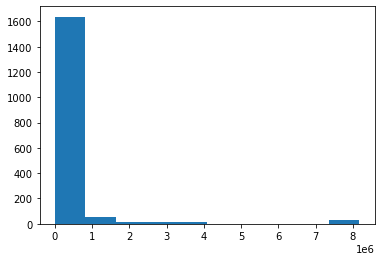

In [58]:
plt.hist(data_copy['sizeofcity'])

In [59]:
data_copy['sizeofcity'].describe()

count    1.758000e+03
mean     3.332372e+05
std      1.163996e+06
min      0.000000e+00
25%      7.000000e+03
50%      3.000000e+04
75%      1.270000e+05
max      8.175000e+06
Name: sizeofcity, dtype: float64

In [60]:
data_copy.groupby('sizeofcity').size()

sizeofcity
0           14
1000        72
2000        41
3000       110
4000        54
          ... 
1526000      4
2099000     11
2696000     11
3793000     17
8175000     31
Length: 146, dtype: int64

### I have 14 instances of 0.00 for the size of place where they interviewed, the codebook says that these values are given to cities that are 1,000 people or less, so I will give them the value of 1,000.

In [62]:
def size_recode(i):
    recode=0
    '''
    Input:
    i: integer, the original values of the 'size' variable
    
    Output:
    recode: repsenting size of current town.
    ''' 
    if pd.isna(i):
        return np.nan
    if i == 0 :
        recode = 1000
    elif i != 0 :
        recode = i
    else:
        print('error')
        print(i)
        
    return recode        

In [63]:
data_copy['sizeofcity'] = data_copy.sizeofcity.apply(size_recode)

In [64]:
data_copy.sizeofcity.unique()

array([  14000,   24000,   56000,  125000,   84000,   17000,   43000,
         11000,    2000, 8175000,    9000,   57000,    7000,   67000,
         26000,  462000, 3793000,  137000,  136000,  336000,   39000,
        124000,  304000,   23000,  193000,   74000,   69000,    8000,
         29000, 2696000,   13000,   30000,   44000,   41000,    6000,
         27000,    4000,  621000,   10000,   71000,  602000,   16000,
         48000,   21000,  618000,   28000,  105000,   95000,   40000,
         32000,  805000,  391000,  946000,   49000,  260000, 1198000,
        117000,  741000,    5000,   61000, 1526000,   15000, 2099000,
          3000,  563000,   94000,   64000,   33000,  420000,  109000,
         92000,   85000,  166000,  399000,   37000,   90000,  714000,
         63000,  134000,   25000,   36000,  198000,   46000,   70000,
        609000,  118000,  439000, 1446000,  285000,    1000,  144000,
       1307000,   93000,  325000,  600000,   12000,   19000,  319000,
         75000,   60

In [65]:
data_copy.groupby('sizeofcity').size()

sizeofcity
1000        86
2000        41
3000       110
4000        54
5000        51
          ... 
1526000      4
2099000     11
2696000     11
3793000     17
8175000     31
Length: 145, dtype: int64

### I will define some population thresholds so I can create a new categorical variable for 'size' because the type of data I have right now is an integer and that is not useful for me.

### Define population thresholds and create the 'locality' variable

In [499]:
pop_thresholds = [0, 4999, 13000, 40000, 160000, 8175000]
labels = ['village', 'township', 'small_city', 'medium_city', 'large_city']

### I used 8,175,000 as the maximum threshold for city population because that was the maximum value in the dataset. Must be NYC.

In [500]:
data_copy['locality'] = pd.cut(data_copy['sizeofcity'], bins=pop_thresholds, labels=labels)

In [501]:
data_copy['locality'].unique()

['small_city', 'medium_city', 'township', 'village', 'large_city']
Categories (5, object): ['village' < 'township' < 'small_city' < 'medium_city' < 'large_city']

### I'll explore why I received some 'Nan' outputs in my new variable 'locality'.

In [502]:
data_copy['locality'].describe()

count            1758
unique              5
top       medium_city
freq              389
Name: locality, dtype: object

In [346]:
data_copy.groupby('locality').size()

locality
village        342
township       331
small_city     398
medium_city    358
large_city     329
dtype: int64

### Perfect!

# Univariate Analysis for 'locality' variable

In [504]:
locality_counts = data_copy.groupby('locality').size()

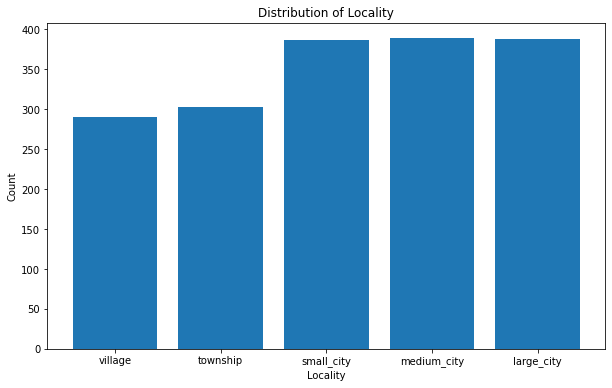

In [505]:
plt.figure(figsize=(10, 6))
plt.bar(locality_counts.index.astype(str), locality_counts.values)
plt.xlabel("Locality")
plt.ylabel("Count")
plt.title("Distribution of Locality")
plt.show()

## The 'Distribution of Locality' plot illustrates a similar smaple size for all 4 different options.

# Univariate Analysis for 'childs' variable

In [523]:
import seaborn as sns

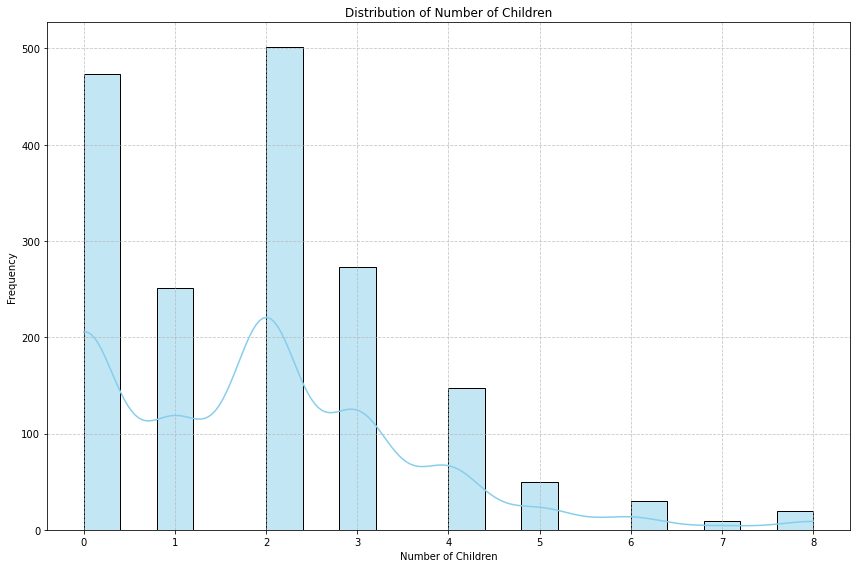

In [644]:
plt.figure(figsize=(12, 8))
sns.histplot(data_copy['childs'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.xlabel('Number of Children')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Children')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Univariate Analysis for Age variable

<AxesSubplot:ylabel='Frequency'>

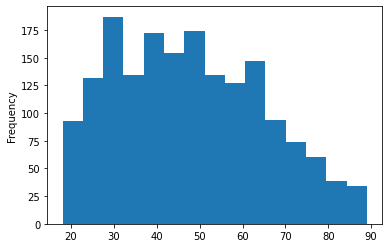

In [531]:
data_copy.age.plot(kind='hist', bins=15)  

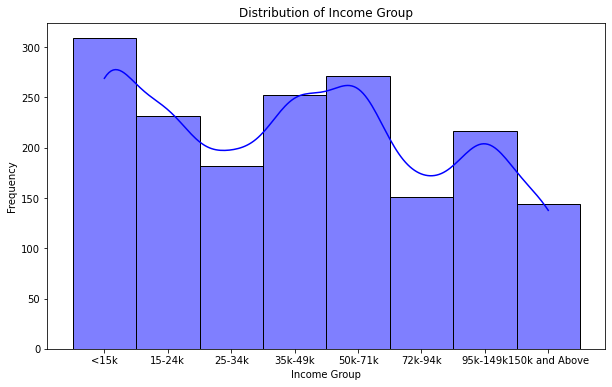

In [643]:
plt.figure(figsize=(10, 6))
sns.histplot(data_copy['income_group'], kde=True, bins=25, color='blue')
plt.xlabel('Income Group')
plt.ylabel('Frequency')
plt.title('Distribution of Income Group')
plt.show()

## In the histogram, the 'Number of Children' plot reveals a right-skewed distribution, indicating that most respondents have fewer children, with a median of 2 and a maximum of 8. 

# Bivariate Analysis

In [507]:
mean_childs_by_locality = data_copy.groupby('locality')['childs'].mean()
print(mean_childs_by_locality)

locality
village        2.044674
township       1.996689
small_city     1.917313
medium_city    1.789203
large_city     1.754522
Name: childs, dtype: float64


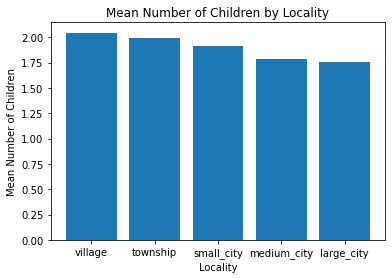

In [508]:
plt.bar(mean_childs_by_locality.index.astype(str), mean_childs_by_locality.values)
plt.xlabel('Locality')
plt.ylabel('Mean Number of Children')
plt.title('Mean Number of Children by Locality')
plt.show()

### I would like to add error bars related to the standard deviation to add context.

In [509]:
std_childs_by_locality = data_copy.groupby('locality')['childs'].std()

In [510]:
n_childs_by_locality = data_copy.groupby('locality')['childs'].count()
sem_childs_by_locality = std_childs_by_locality / np.sqrt(n_childs_by_locality)

Text(0.5, 1.0, 'City-Dwellers Averaged Less Children than Small-Town Counterparts, 2012 GSS (N=1758)')

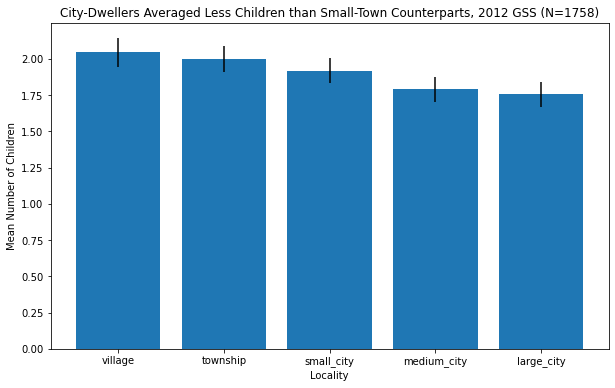

In [511]:
plt.figure(figsize=(10, 6))
bars = plt.bar(mean_childs_by_locality.index.astype(str), mean_childs_by_locality.values, yerr=sem_childs_by_locality.values)
plt.xlabel("Locality")
plt.ylabel("Mean Number of Children")
plt.title("City-Dwellers Averaged Less Children than Small-Town Counterparts, 2012 GSS (N=1758)")

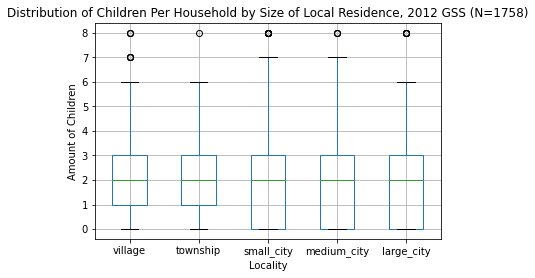

In [512]:
data_copy.boxplot(column='childs', by='locality')
plt.title('Distribution of Children Per Household by Size of Local Residence, 2012 GSS (N=1758)')
plt.xlabel('Locality')
plt.ylabel('Amount of Children')
plt.suptitle('')
plt.show()

## In the bivariate analysis, we show the effect observed in 'City-Dwellers Averaged Less Children than Small-Town Counterparts' which illustrates the mean number of children for each locality (small town, large town, city). This chart aids in illustrating the effect we want to explore the most, which is the difference in the average number of children between city dwellers and those living in smaller towns. The standard error of the mean is represented by the error bars. 

### I'd like to unpack some of these variables to gain more insight on our participants.

In [514]:
def calculate_mean_income(income_str):
    """Calculates the mean income value from an income string."""
    if 'UNDER' in income_str :
        avg = 1000
        
    elif 'OVER' in income_str:
        avg = 150000 
        
    elif 'TO' in income_str :
        income = income_str.split('TO')
        
        lower = ''
        for i in income[0]:
            if i.isdigit():
                lower += i
        
        higher = ''
        for j in income[1]:
                if j.isdigit():
                        higher += j
                        
        avg = (int(lower) + int(higher))/2
        
    else:
        print('error')
        print(income_str)
    return avg

In [434]:
data_copy['avg_inc'] = data_copy.income06.apply(calculate_mean_income)

In [515]:
boxplot_of_childs = data_copy.groupby('locality')['avg_inc'].agg(['mean', 'median', 'max', 'min', 'count'])

In [516]:
mean_childs = data_copy.groupby(['locality', 'avg_inc'])['childs'].mean().unstack()

Text(0.5, 0.98, '')

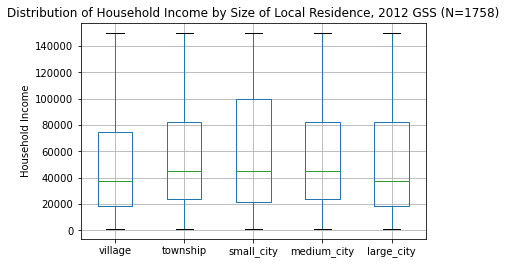

In [518]:
data_copy.boxplot(column='avg_inc',
             by='locality')                                   


plt.title('Distribution of Household Income by Size of Local Residence, 2012 GSS (N=1758)')
plt.xlabel('')
plt.ylabel('Household Income')
plt.suptitle('')

In [527]:
data_copy['income_group'] = pd.cut(data_copy['avg_inc'], bins=[0, 10000, 39999.5, 79499.5, 149999, np.inf],
                                    labels=['<20k', '20k-39k', '40k-79k', '80k-120k', '121k and Above'])

In [528]:
data_copy.income_group.value_counts()

20k-39k           655
40k-79k           422
80k-120k          368
<20k              169
121k and Above    144
Name: income_group, dtype: int64

In [529]:
data_copy['income_group'] = pd.cut(data_copy['avg_inc'], bins=[0, 14999, 24999, 34499.5, 49500, 79499.5, 95000, 149999, np.inf],
                                    labels=['<15k', '15-24k', '25-34k', '35k-49k', '50k-71k','72k-94k', '95k-149k', '150k and Above'])

In [530]:
data_copy.income_group.value_counts()

<15k              309
50k-71k           271
35k-49k           252
15-24k            232
95k-149k          217
25-34k            182
72k-94k           151
150k and Above    144
Name: income_group, dtype: int64

In [533]:
data_copy['income_group'] = data_copy['income_group'].cat.as_ordered()

In [535]:
data_copy['income_group'] = pd.cut(data_copy['avg_inc'], bins=[0, 14999, 24999, 34499.5, 49500, 79499.5, 95000, 149999, np.inf],
                                    labels=['<15k', '15-24k', '25-34k', '35k-49k', '50k-71k','72k-94k', '95k-149k', '150k and Above'])

In [536]:
from pandas.api.types import CategoricalDtype as cd

In [537]:
income_bins = [0, 14999, 24999, 34499.5, 49500, 79499.5, 95000, 149999, np.inf]
income_labels = ['<15k', '15-24k', '25-34k', '35k-49k', '50k-71k','72k-94k', '95k-149k', '150k and Above']

In [538]:
cat_type = cd(categories=income_labels, ordered=True)

In [539]:
data_copy['income_group'] = pd.cut(data_copy['avg_inc'], bins=income_bins, labels=income_labels).astype(cat_type)

In [541]:
income_counts = data_copy.groupby('locality')['income_group'].value_counts().unstack()

In [543]:
data_copy.age.corr(data_copy.childs) 

0.36018251706726223

## A strong correlation should be observed here.

<Figure size 720x432 with 0 Axes>

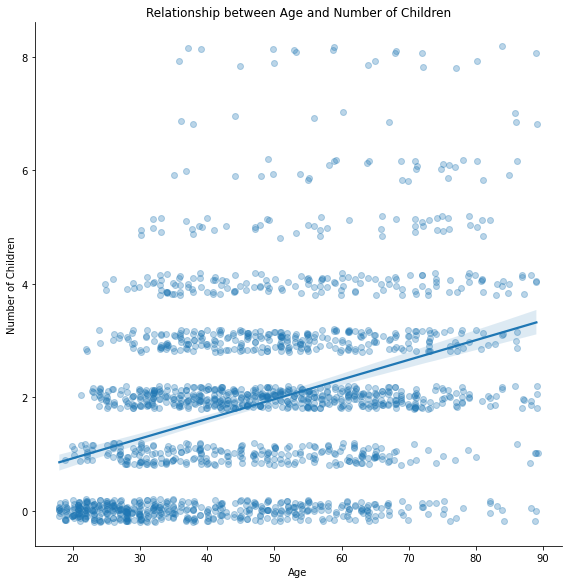

In [544]:
plt.figure(figsize=(10, 6))
sns.lmplot(x='age', y='childs', data=data_copy, x_jitter=0.2, y_jitter=0.2, scatter_kws={'alpha':0.3}, height=8)
plt.xlabel('Age')
plt.ylabel('Number of Children')
plt.title('Relationship between Age and Number of Children')
plt.show()

In [545]:
data_copy.avg_inc.corr(data_copy.childs) 

-0.06274494406608846

<Figure size 720x432 with 0 Axes>

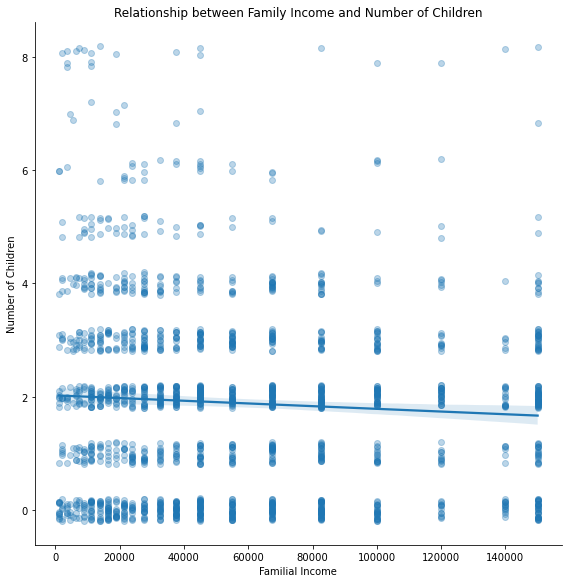

In [546]:
plt.figure(figsize=(10, 6))
sns.lmplot(x='avg_inc', y='childs', data=data_copy, x_jitter=0.2, y_jitter=0.2, scatter_kws={'alpha':0.3}, height=8)
plt.xlabel('Familial Income')
plt.ylabel('Number of Children')
plt.title('Relationship between Family Income and Number of Children')
plt.show()

## Very, very slight negative correlation observed between Family Income and Number of Children.

In [547]:
mean_childs_by_locality = data_copy.groupby('locality')['childs'].mean()
std_childs_by_locality = data_copy.groupby('locality')['childs'].std()
n_childs_by_locality = data_copy.groupby('locality')['childs'].count()
sem_childs_by_locality = std_childs_by_locality / np.sqrt(n_childs_by_locality)

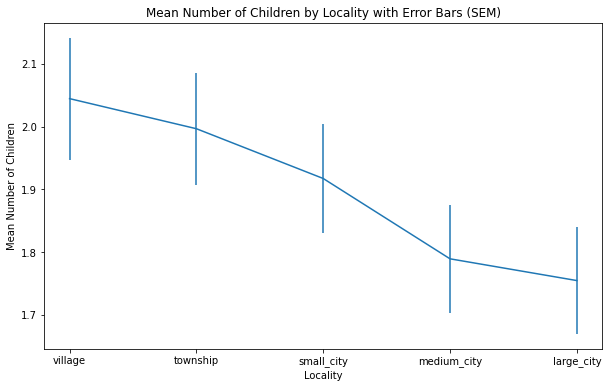

In [548]:
plt.figure(figsize=(10, 6))
plt.errorbar(mean_childs_by_locality.index.astype(str), mean_childs_by_locality.values, yerr=sem_childs_by_locality.values)
plt.xlabel('Locality')
plt.ylabel('Mean Number of Children')
plt.title('Mean Number of Children by Locality with Error Bars (SEM)')
plt.show()

## This is the main effect we all came to see. Hip, hip, hooray.

### City Dwellers are having less children but more detailed statistical analyses must be done in order to claim significance. 
## Nonetheless, with the majority of our population living in large cities; the sprawl of urbanization needs to be paired with an ease of living that can lower the cost of living. Give city-dwellers the financial security that has become the barrier for fertility rates rising above replacement.

# Multivariate Analysis

In [579]:
mean_childs = data_copy.groupby(['locality', 'income_group'])['childs'].mean().unstack()

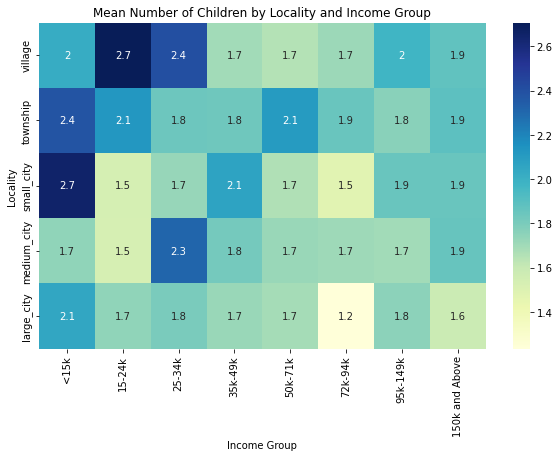

In [580]:
plt.figure(figsize=(10, 6))
sns.heatmap(mean_childs, annot=True, cmap='YlGnBu')
plt.xlabel('Income Group')
plt.ylabel('Locality')
plt.title('Mean Number of Children by Locality and Income Group')
plt.savefig('mean_number_of_children_by_income_and_locality.jpg')
plt.show()


### It's interesting to note that the only instance where the large city counterpart is having more children is in the 25-34k familial income range which is right at the poverty line and could represent those most eligible for government subsidies. If government subsidies are showing to be effective in improving the financial security of those respondents, so much so, that they are producing children above the level of replacement, then those government programs have been successful in this time period.

## It is interesting to see that those City-Dwellers that make 50k and above are really struggling to have children. I'm sure there are many factors that contribute but it speaks of a city that is not conducive to big families and an environment that could put a significant strain on our most precious resource, time.

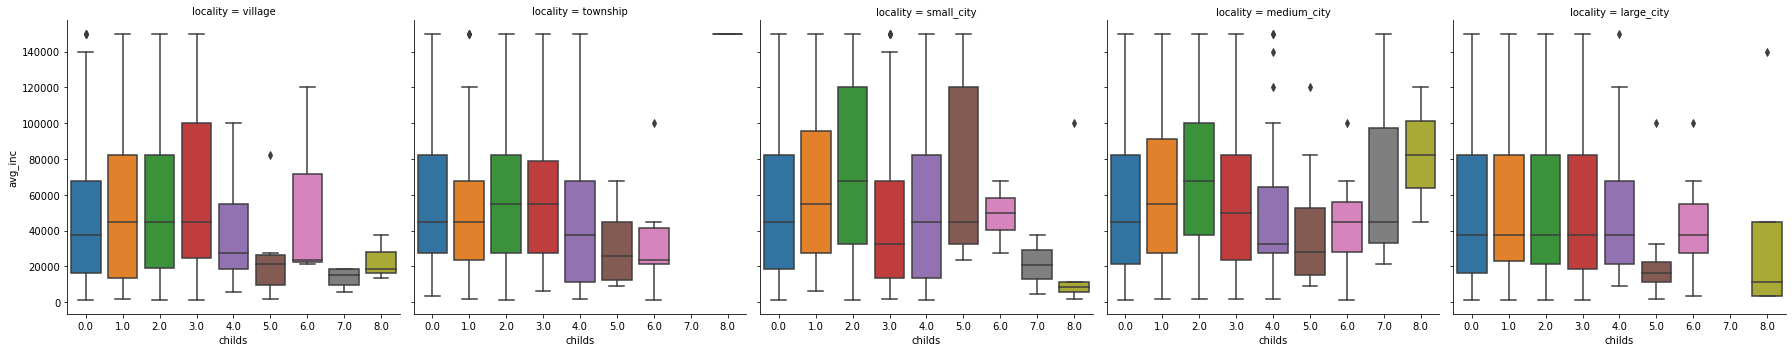

In [576]:
sns.catplot(x="childs",
           y="avg_inc",
            
            col="locality",
            col_wrap=5,
           
           kind='box',
           data=data_copy)

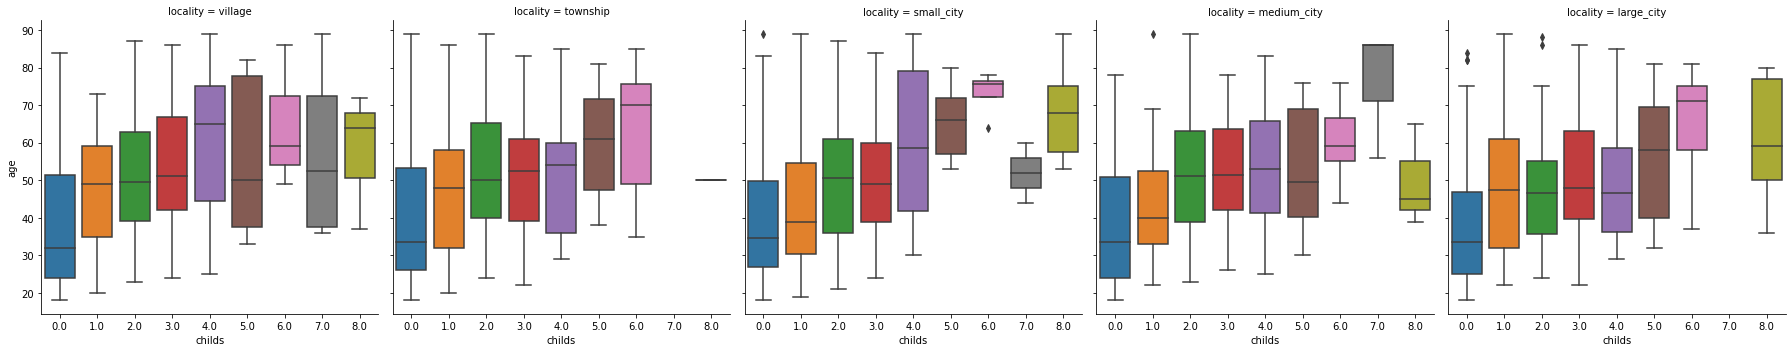

In [583]:
sns.catplot(x="childs",
           y="age",
            
            col="locality",
            col_wrap=5,
           
           kind='box',
           data=data_copy)

In [597]:
mean_childs = data_copy.groupby(['locality', 'income_group', 'childs']).size().reset_index(name='counts')

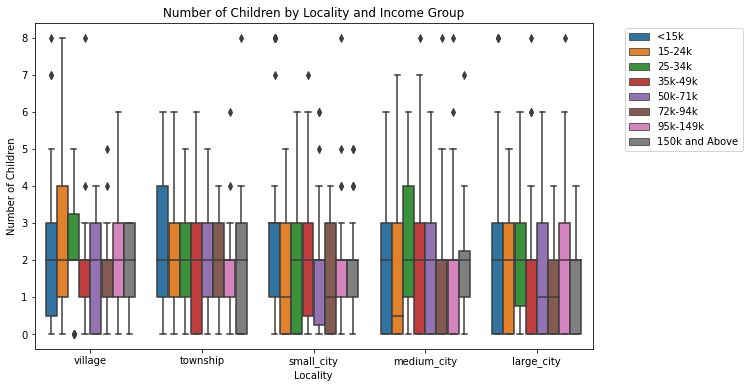

In [599]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='locality', y='childs', data=data_copy, hue='income_group')
plt.xlabel('Locality')
plt.ylabel('Number of Children')
plt.title('Number of Children by Locality and Income Group')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [555]:
data_copy[data_copy.locality==('village' or 'township')][['avg_inc', 'childs']].corr()

,avg_inc,childs
avg_inc,1.000000,-0.089684
childs,-0.089684,1.000000


In [556]:
data_copy[data_copy.locality==('small_city')][['avg_inc', 'childs']].corr()

,avg_inc,childs
avg_inc,1.000000,-0.090722
childs,-0.090722,1.000000


In [557]:
data_copy[data_copy.locality==('medium_city')][['avg_inc', 'childs']].corr()

,avg_inc,childs
avg_inc,1.000000,0.000509
childs,0.000509,1.000000


In [558]:
data_copy[data_copy.locality==('large_city')][['avg_inc', 'childs']].corr()

,avg_inc,childs
avg_inc,1.000000,-0.066349
childs,-0.066349,1.000000


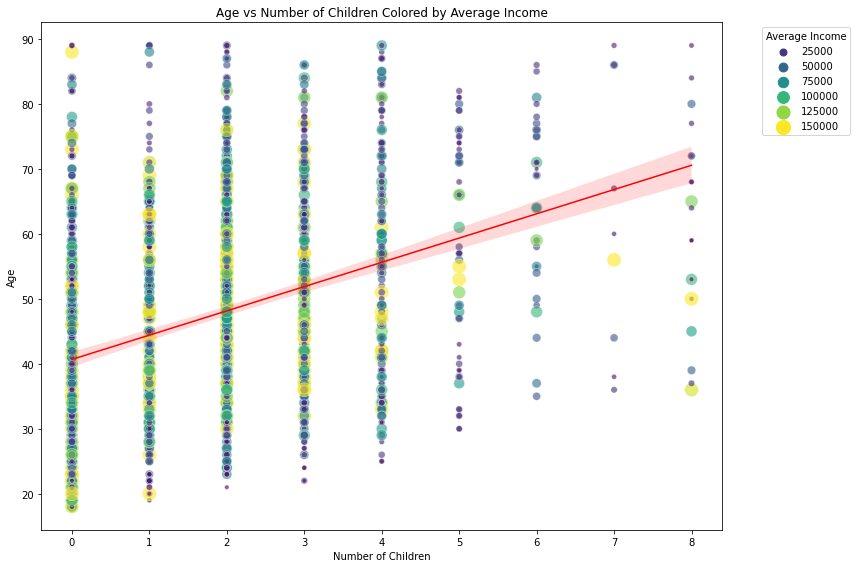

In [642]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data_copy, x="childs", y="age", hue="avg_inc", palette="viridis", size="avg_inc", sizes=(20, 200), alpha=0.6, edgecolor="w", linewidth=0.5)
sns.regplot(data=data_copy, x="childs", y="age", scatter=False, color="red", line_kws={"linewidth": 1.5})
plt.xlabel('Number of Children')
plt.ylabel('Age')
plt.title('Age vs Number of Children Colored by Average Income')
plt.legend(title='Average Income', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [635]:
data_copy['mean_childs'] = data_copy.groupby(['locality', 'income_group'])['childs'].transform('mean')

In [636]:
pointplot_data = data_copy.groupby(['locality', 'income_group'])['mean_childs'].mean().reset_index()

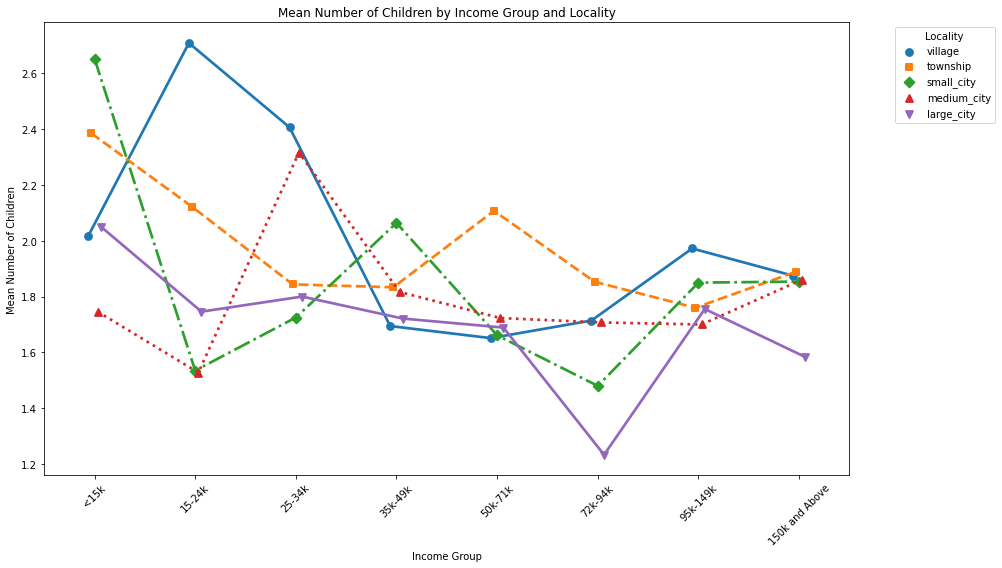

In [640]:
plt.figure(figsize=(14, 8))
sns.pointplot(x='income_group', y='mean_childs', hue='locality', data=pointplot_data, dodge=True,
              markers=["o", "s", "D", "^", "v"], linestyles=["-", "--", "-.", ":", "-"])
plt.xlabel('Income Group')
plt.ylabel('Mean Number of Children')
plt.title('Mean Number of Children by Income Group and Locality')
plt.legend(title='Locality', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('pointplot_mean_number_of_children.jpg')
plt.show()

## The pattern that I'm seeing is that when the income bracket gets to individuals that are making just enough household income to survive and not thrive, the mean number of children takes a hit. In the income brackets prior, perhaps those individuals are getting enough government subsidies that it becomes beneficial to still have kids. It's possible that there are many reasons for the fluctuations but it stands to reason that those who live in large cities are struggling to have 2 children per household.

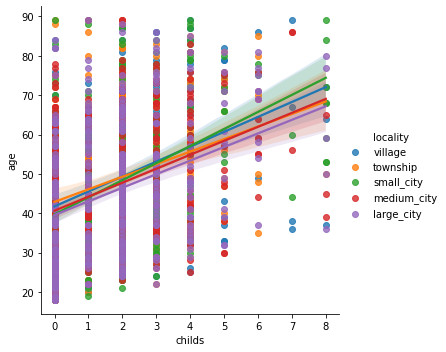

In [566]:
sns.lmplot(data = data_copy,
          x = 'childs',
          y = 'age',
          hue = 'locality')

In [560]:
data2= df[['childs', 'age']]
data2.corr()

,childs,age
childs,1.000000,0.375761
age,0.375761,1.000000


In [632]:
data_copy['mean_childs'] = data_copy.groupby(['locality', 'income_group'])['childs'].transform('mean')

In [633]:
barplot_data = data_copy.groupby(['locality', 'income_group'])['mean_childs'].mean().reset_index()

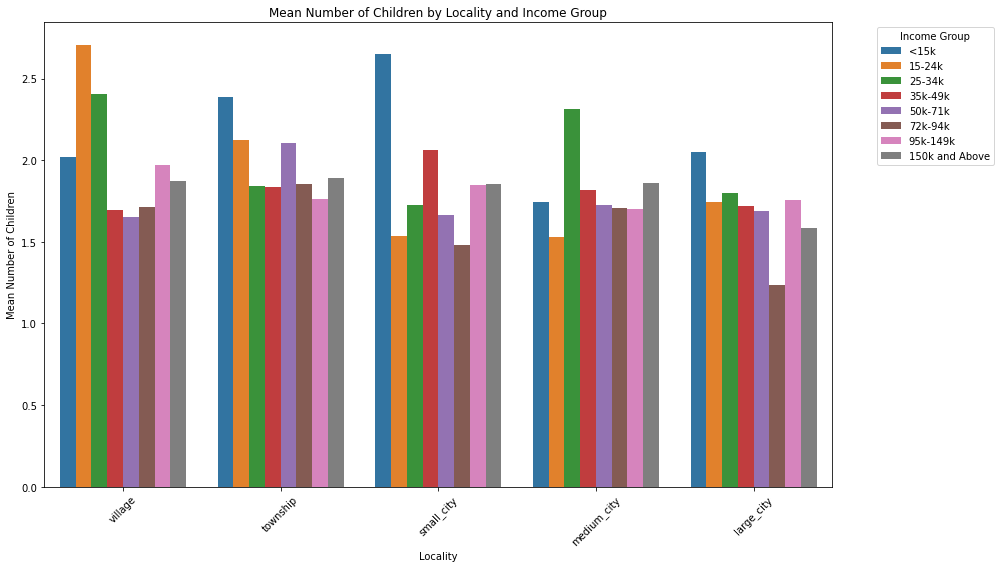

In [634]:
plt.figure(figsize=(14, 8))
sns.barplot(x='locality', y='mean_childs', hue='income_group', data=barplot_data)
plt.xlabel('Locality')
plt.ylabel('Mean Number of Children')
plt.title('Mean Number of Children by Locality and Income Group')
plt.legend(title='Income Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('barplot_mean_number_of_children.jpg')
plt.show()

## We fail to see a rise in mean number of children as income increases.

# Results

## The main findings have been that city dwellers had fewer children than those in small towns, but income played a significant role. City dwellers with incomes between 25k and 34k had more children than their counterparts in smaller towns, likely due to government subsidies. In contrast, city dwellers with higher incomes had fewer children. This suggests that the higher cost of living in cities may be a deterrent to having larger families, especially for those with higher incomes who may not qualify for subsidies.

## My results partially confirm my assumptions. I found that urban communities does seem to play a role in influencing family size decisions, with city dwellers tending to have fewer children. However, I also found that income plays a significant role, suggesting that economic factors may be more important than social factors in influencing fertility rates.

## Additionally, I did not have data on the number of hours worked, so i could not investigate whether longer work hours are associated with lower fertility rates.

## I learned that the relationship between urbanization and fertility is complex and multifaceted. While living in large cities do seem to be associated with lower fertility rates, other factors, such as income, also play a significant role. Further research is needed to fully understand the complex interplay between these factors.

## Limitations

## However, I did not specifically identify full-time employees, so I cannot definitively conclude whether they struggle to have children compared to those in smaller towns.




# Conclusions

## To finish strong, I really wanted to see if a longer commute time served as a moderating variable for this dip in children for city-dwellers making over 50k. However, the commute variable is only available from 1983-87 and the 'wrkstat' variable doesn't have a way to seperate those who work full time and those who may work longer hours than the typical 40 hrs/week. Either way, I know us sociologists are not supposed to ask a research question with a destination in mind; but it was good to see that there's actually something to the idea that urbanization does have long-term impacts that can be harmful to our willingness, and more controversially, our ability, to be fruitful and multiply. 

# References

### Consulted with ChatGpt - 4o mini (free version) for help with different plots, creating the regression line, and informing me about certain arguments that could help me plot data more efficiently. 

### Project by: Delroy Nichols